
In this assignment students will build the random forest model after 
normalizing the variable to house pricing from boston data set.
Following the code to get data into the environment:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import 
train_test_split from sklearn.preprocessing 
import StandardScaler from sklearn import 
datasets boston = datasets.load_boston()
features = pd.DataFrame(boston.data, 
columns=boston.feature_names)
targets = boston.target

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split 
from sklearn.preprocessing import StandardScaler 
from sklearn import datasets 
boston = datasets.load_boston()
features = pd.DataFrame(boston.data,columns=boston.feature_names)
targets = boston.target

C:\Users\amits\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing dataset (

In [3]:

import math
from sklearn.ensemble import RandomForestRegressor 
from sklearn import metrics 
from sklearn.model_selection import cross_val_score 
from sklearn.datasets import load_boston 
from sklearn.model_selection import KFold 
from sklearn.model_selection import GridSearchCV 
import warnings 
warnings.filterwarnings('ignore')

In [4]:
features

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48


In [5]:
targets

array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9, 15. ,
       18.9, 21.7, 20.4, 18.2, 19.9, 23.1, 17.5, 20.2, 18.2, 13.6, 19.6,
       15.2, 14.5, 15.6, 13.9, 16.6, 14.8, 18.4, 21. , 12.7, 14.5, 13.2,
       13.1, 13.5, 18.9, 20. , 21. , 24.7, 30.8, 34.9, 26.6, 25.3, 24.7,
       21.2, 19.3, 20. , 16.6, 14.4, 19.4, 19.7, 20.5, 25. , 23.4, 18.9,
       35.4, 24.7, 31.6, 23.3, 19.6, 18.7, 16. , 22.2, 25. , 33. , 23.5,
       19.4, 22. , 17.4, 20.9, 24.2, 21.7, 22.8, 23.4, 24.1, 21.4, 20. ,
       20.8, 21.2, 20.3, 28. , 23.9, 24.8, 22.9, 23.9, 26.6, 22.5, 22.2,
       23.6, 28.7, 22.6, 22. , 22.9, 25. , 20.6, 28.4, 21.4, 38.7, 43.8,
       33.2, 27.5, 26.5, 18.6, 19.3, 20.1, 19.5, 19.5, 20.4, 19.8, 19.4,
       21.7, 22.8, 18.8, 18.7, 18.5, 18.3, 21.2, 19.2, 20.4, 19.3, 22. ,
       20.3, 20.5, 17.3, 18.8, 21.4, 15.7, 16.2, 18. , 14.3, 19.2, 19.6,
       23. , 18.4, 15.6, 18.1, 17.4, 17.1, 13.3, 17.8, 14. , 14.4, 13.4,
       15.6, 11.8, 13.8, 15.6, 14.6, 17.8, 15.4, 21

In [6]:
X = pd.DataFrame(boston.data,columns=boston.feature_names)

In [7]:
y = boston.target

In [8]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, roc_auc_score

In [9]:
X.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000


In [10]:
X.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
dtype: int64

In [11]:
x_train,x_test,y_train,y_test = train_test_split(X,y,test_size = 0.25, random_state= 42)

In [12]:
scaler = StandardScaler()
scaler.fit(x_train)
X_train = scaler.transform(x_train)
X_test = scaler.transform(x_test)

In [13]:
y_scaler = StandardScaler()
y_train = y_scaler.fit_transform(y_train[:, None])[:, 0] 
y_test = y_scaler.transform(y_test[:, None])[:, 0]

In [15]:
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor()
model.fit(X_train, y_train) 
y_pred = model.predict(X_test)
print("Test Accuracy:", format(metrics.r2_score(y_test, y_pred) * 100, '.2f'), '%')
print("Mean Squared Error:", format(metrics.mean_squared_error(y_test, y_pred), '.5f')) 

Test Accuracy: 85.67 %
Mean Squared Error: 0.11313


In [16]:
parameters = {"min_samples_split": [2, 5, 10], "max_depth": [None, 2, 5, 10], "min_samples_leaf": [1, 3, 5], "max_features": ['auto', 'sqrt', 'log2'], "n_estimators": [50, 75, 100] }

In [17]:
grid_search = GridSearchCV(RandomForestRegressor(), param_grid=parameters, n_jobs=-1, verbose=1) 
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 324 candidates, totalling 1620 fits


GridSearchCV(estimator=RandomForestRegressor(), n_jobs=-1,
             param_grid={'max_depth': [None, 2, 5, 10],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'min_samples_leaf': [1, 3, 5],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [50, 75, 100]},
             verbose=1)

In [18]:
print("Best parameters set found on development set:\n") 
print(grid_search.best_params_)

Best parameters set found on development set:

{'max_depth': 10, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 75}


In [19]:
print("Accuracy for test data set:\n") 
y_pred = grid_search.predict(X_test) 
print("Test Accuracy:", format(metrics.r2_score(y_test, y_pred) * 100, '.2f'), '%') 
print("Mean Squared Error:", format(metrics.mean_squared_error(y_test, y_pred), '.5f'))

Accuracy for test data set:

Test Accuracy: 82.81 %
Mean Squared Error: 0.13576


In [20]:
from math import sqrt
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [22]:
rf_RMSE_test_error=sqrt(mean_squared_error(y_test, y_pred))
print(f"rf_Test_error: {rf_RMSE_test_error:.2f}")

rf_Test_error: 0.37


In [23]:
print(mean_absolute_error(y_test, y_pred))

0.22270062873936405


In [24]:
r2_test = r2_score(y_test, y_pred)
print(r2_test)

0.82807331445117


       Actual  Predicted
0    0.073492   0.035434
1    1.007963   0.975316
2   -0.988406  -0.842410
3   -0.011460   0.121178
4   -0.722931  -0.611466
..        ...        ...
122 -1.498117  -1.467737
123 -0.393743  -0.235872
124  0.254015   0.225187
125 -0.266315  -0.049620
126  0.020397   0.186169

[127 rows x 2 columns]


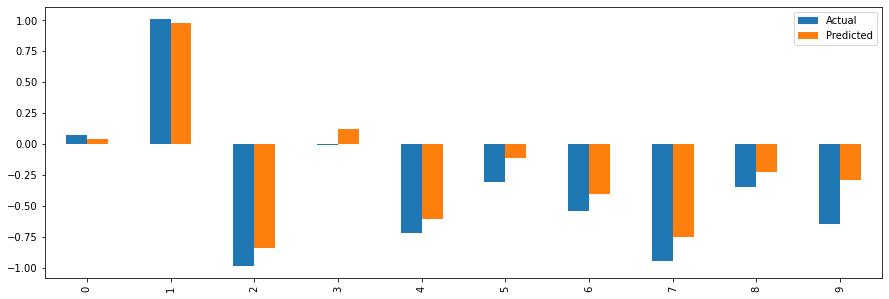

In [26]:
rf_compare = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
print(rf_compare)
(rf_compare.head(10)).plot(kind='bar', figsize=(15,5))
plt.show() 